### Exploratory Timeseries Anlaysis

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib
import matplotlib.font_manager as fm
matplotlib.rcParams['axes.unicode_minus'] = False

fm.get_fontconfig_fonts()
font_location = "c:/windows/Fonts/malgun.ttf"
font_name = fm.FontProperties(fname=font_location).get_name()
matplotlib.rc('font', family=font_name)

#### 이동 평균(Moving Average)

In [3]:
data = pd.DataFrame({'x':[1,5,2,3,4,6,2,5,3,3]})

In [5]:
data.x.rolling(3).mean() # window_size = 3 , 3개씩 평균을 냄 1 5 2 평균 5 2 3 평균, 중간을 기준으로 안함

0         NaN
1         NaN
2    2.666667
3    3.333333
4    3.000000
5    4.333333
6    4.000000
7    4.333333
8    3.333333
9    3.666667
Name: x, dtype: float64

In [6]:
data.x.rolling(3, center=True).mean() # center를 True하면 가운데 기준으로 이전 다음 시점 평균

0         NaN
1    2.666667
2    3.333333
3    3.000000
4    4.333333
5    4.000000
6    4.333333
7    3.333333
8    3.666667
9         NaN
Name: x, dtype: float64

In [7]:
data['ma3'] = data.x.rolling(3, center=True).mean() # 이동평균은 윈도우 만 움직여서 평균을 냄
data['ma6'] = data.x.rolling(6, center=True).mean()

In [8]:
data.head()

,x,ma3,ma6
0,1,NaN,NaN
1,5,2.666667,NaN
2,2,3.333333,NaN
3,3,3.000000,3.500000
4,4,4.333333,3.666667


In [10]:
# !pip install finance-datareader

In [11]:
# 삼성전자 주가 예제
import FinanceDataReader as fdr
sse = fdr.DataReader('005930', '2020') # 2020년부터의 삼성전자 주가 저장
sse.head()

,Open,High,Low,Close,Volume,Change
Date,,,,,,
2020-01-02,55500,56000,55000,55200,12993228,-0.010753
2020-01-03,56000,56600,54900,55500,15422255,0.005435
2020-01-06,54900,55600,54600,55500,10278951,0.000000
2020-01-07,55700,56400,55600,55800,10009778,0.005405
2020-01-08,56200,57400,55900,56800,23501171,0.017921


In [12]:
sse = sse.reset_index()
sse.head()

,Date,Open,High,Low,Close,Volume,Change
0,2020-01-02,55500,56000,55000,55200,12993228,-0.010753
1,2020-01-03,56000,56600,54900,55500,15422255,0.005435
2,2020-01-06,54900,55600,54600,55500,10278951,0.000000
3,2020-01-07,55700,56400,55600,55800,10009778,0.005405
4,2020-01-08,56200,57400,55900,56800,23501171,0.017921


In [13]:
sse['ma5'] = sse.Close.rolling(5, center = True).mean()
sse['ma20'] = sse.Close.rolling(20, center = True).mean()
sse['ma50'] = sse.Close.rolling(50, center = True).mean()

In [14]:
# 2020-01-08의 5일 이동평균 오차 = 56800-57240
sse.loc[sse.Date =='2020-01-08', :]

,Date,Open,High,Low,Close,Volume,Change,ma5,ma20,ma50
4,2020-01-08,56200,57400,55900,56800,23501171,0.017921,57240.0,NaN,NaN


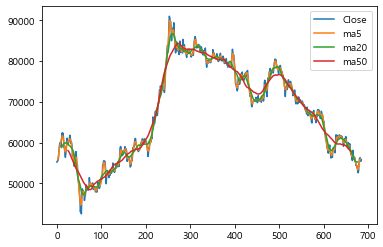

In [15]:
sse.plot(y=['Close', 'ma5', "ma20", "ma50"]) # window size카 클수록 큰 trend 표시 작을수록 원데이터를 표현함
plt.show()

In [16]:
# 차분하기
sse['diff1'] = sse.Close.diff() # 시차가 1

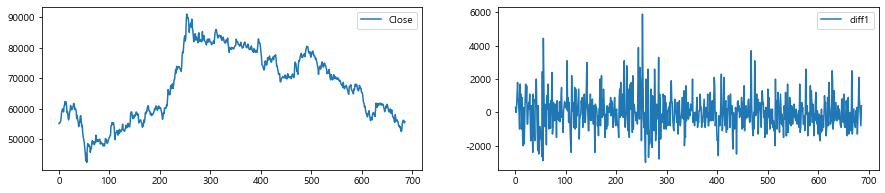

In [17]:
fig, axes = plt.subplots(1,2, figsize =(15,3))
sse.plot(y='Close', ax = axes[0])
sse.plot(y='diff1', ax = axes[1])
plt.show()
# 시계열 모형에서 추세가 없다라고 가정하는 경우가 있어서 차분을 사용함
# 계절성 제거 : M의 주기를 갖는 계절적 패턴을 제거하기 위해 시차가 M인 차분을 실시
# (예) 월별 자료의 연간 패턴을 없애기 위해서 시차 12의 차분

#### 지수 평활 (Exponential Smoothing)

In [19]:
data.head()

# pandas의 ewm 사용, 위 아래 비슷한 결과가 나옴
data['ewm']=data.x.ewm(alpha=0.2, adjust = False).mean() # alpha : 평활상수
data.head()

# t = 1 ; 0.2 *5 + 0.8*1 = 1.8
# t = 2 ; 0.2*2 + 0.8*1.8 = ay_2 + (1-a)*F_1 = 1.84
# t = 3 ; 0.2*3 + 0.8*1.84 = 2.072

,x,ma3,ma6,ewm
0,1,NaN,NaN,1.0000
1,5,2.666667,NaN,1.8000
2,2,3.333333,NaN,1.8400
3,3,3.000000,3.500000,2.0720
4,4,4.333333,3.666667,2.4576


In [20]:
# statsmodels의 SimpleExpSmoothing 사용
from statsmodels.tsa.api import SimpleExpSmoothing

fit_data = SimpleExpSmoothing(data.x).fit(
    smoothing_level=0.2, optimized=False)
fit_data.fittedvalues

0    1.000000
1    1.000000
2    1.800000
3    1.840000
4    2.072000
5    2.457600
6    3.166080
7    2.932864
8    3.346291
9    3.277033
dtype: float64

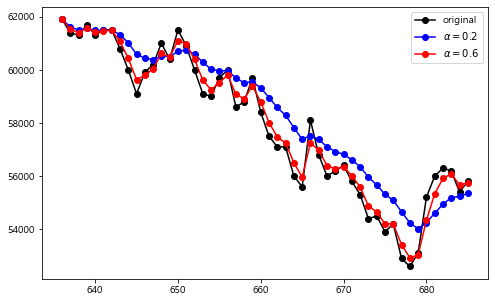

In [21]:
# 삼성전자 주가 예제

# pandas의 ewm 사용 

fit_ewm1 = sse.Close[-50:].ewm(alpha=0.2).mean()
fit_ewm2 = sse.Close[-50:].ewm(alpha=0.6).mean()

plt.figure(figsize=(8,5))
line1, = plt.plot(sse.Close[-50:], marker='o', color='black')
line2, = plt.plot(fit_ewm1, marker='o', color='blue')
line3, = plt.plot(fit_ewm2, marker='o', color='red')
plt.legend([line1, line2, line3],['original', r'$\alpha=0.2$', r'$\alpha=0.6$'])
plt.show()
# alpha가 작을수록 큰 트렌드 흐름을 보여줌
# alpha가 클수록 원 데이터의 흐름을 보여줌

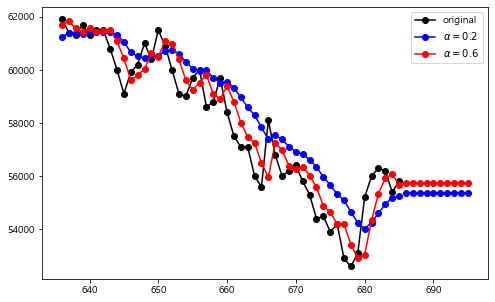

In [22]:
# statsmodels의 SimpleExpSmoothing 사용

fit1 = SimpleExpSmoothing(sse.Close[-50:]).fit(smoothing_level=0.2)
fit2 = SimpleExpSmoothing(sse.Close[-50:]).fit(smoothing_level=0.6)

# 예측 : 미래에 대한 예측치는 모두 동일한(flat) 형태를 지님
fcast1 = fit1.forecast(10) # 10개 시점에 대한 forecast pandas ewm은 제공 x simpleExpSmoothing은 제공 
fcast2 = fit2.forecast(10) # 20개 시점에 대한 forecast

plt.figure(figsize=(8,5))
line1, = plt.plot(sse.Close[-50:], marker='o', color='black')
line2, = plt.plot(fit1.fittedvalues, marker='o', color='blue')
plt.plot(fcast1, marker='o', color='blue')
line3, = plt.plot(fit2.fittedvalues, marker='o', color='red')
plt.plot(fcast2, marker='o', color='red')
plt.legend([line1, line2, line3],['original', r'$\alpha=0.2$', r'$\alpha=0.6$'])
plt.show()

#### 차분하기 (Diffrencing)

In [24]:
data_path = "./data/"
amtrak = pd.read_csv(data_path+"Amtrak.csv")

In [25]:
amtrak.head(20) # 매달의 자료가 가지는 패턴을 확인

,Month,Ridership
0,Jan.91,1709
1,Feb.91,1621
2,Mar.91,1973
3,Apr.91,1812
4,May.91,1975
5,Jun.91,1862
6,Jul.91,1940
7,Aug.91,2013
8,Sep.91,1596
9,Oct.91,1725


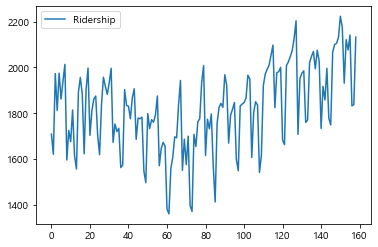

In [26]:
amtrak.plot(y='Ridership')
plt.show()
# 계절성이 존재하며, 1차 차분을 하기보다 시차가 12인 차분을 해줌

In [27]:
amtrak['diff12'] = amtrak.Ridership.diff(periods=12)
# 전년도 대비 이번년도 달의 변화

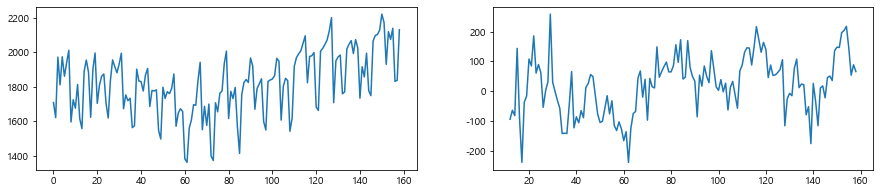

In [28]:
fig, axes = plt.subplots(1,2, figsize=(15,3))
amtrak.Ridership.plot(ax = axes[0])
amtrak.diff12.plot(ax = axes[1])
plt.show()
# 주기적으로 반복하는 패턴을 제거

#### 시계열 분해 (Timeseries Decompose)

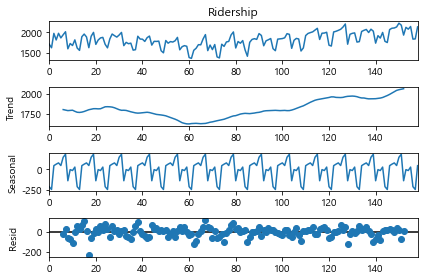

In [32]:
from statsmodels.tsa.seasonal import seasonal_decompose

result = seasonal_decompose(amtrak.Ridership, model='additive', # additive = 더하기 위의 식을 의미, multiplicative 는 곱을 의미
                            period=12) #월별 자료고 12개월씩 반복 되기 때문에 period = 12
result.plot()
plt.show()

In [33]:
result.seasonal

0     -212.284255
1     -247.159255
2       47.368523
3       65.913662
4       81.233106
          ...    
154    -12.905783
155     29.795606
156   -212.284255
157   -247.159255
158     47.368523
Name: seasonal, Length: 159, dtype: float64

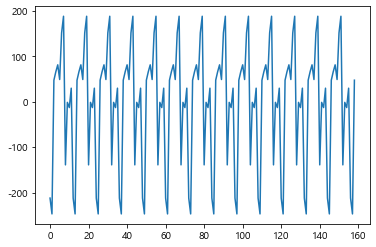

In [34]:
result.seasonal.plot()

In [35]:
result.trend

0     NaN
1     NaN
2     NaN
3     NaN
4     NaN
       ..
154   NaN
155   NaN
156   NaN
157   NaN
158   NaN
Name: trend, Length: 159, dtype: float64

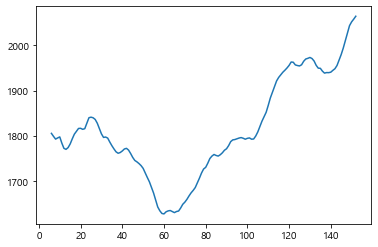

In [36]:
result.trend.plot()

In [37]:
result.resid[:20]

0            NaN
1            NaN
2            NaN
3            NaN
4            NaN
5            NaN
6     -17.238982
7      25.587941
8     -57.969752
9     -69.208801
10   -109.010884
11     -0.003940
12     54.575921
13     33.659255
14     69.298144
15    107.711338
16     10.100227
17   -229.833801
18    -58.738982
19     -7.828726
Name: resid, dtype: float64

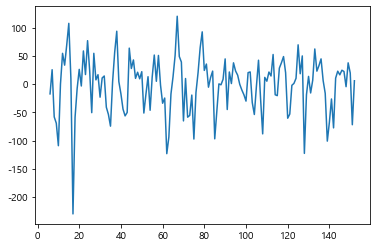

In [38]:
result.resid.plot()

## 확률적 시계열 분석

#### ARMA Model

c:\Users\lucky\anaconda3\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


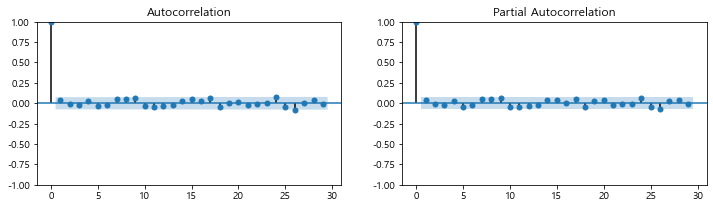

In [41]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
fig, axes = plt.subplots(1,2, figsize=(12,3))
plot_acf(sse.diff1[1:],ax=axes[0])
plot_pacf(sse.diff1[1:], ax=axes[1] )
plt.show()
# Autocorrelation x축 : lag를 의미
# Partial Autocorrelation의 x축 : lag 의미
# 하지만 이전 시점의 영향을 제거한 correlation

In [42]:
from statsmodels.tsa.arima.model import ARIMA
model = ARIMA(sse.Close, order=(1,1,0)).fit() 
# I가 들어간다는 것은, 원 데이터를 1번 차분하고 ARMA 모형을 fitting order : (AR차수, 얼마나 차분, MA차수)
model.summary().tables[0]

Dep. Variable:,Close,No. Observations:,686
Model:,"ARIMA(1, 1, 0)",Log Likelihood,-5742.299
Date:,"Thu, 13 Oct 2022",AIC,11488.598
Time:,04:02:59,BIC,11497.657
Sample:,0,HQIC,11492.104
,- 686,,
Covariance Type:,opg,,


In [43]:
fcast_arima = model.forecast(10)

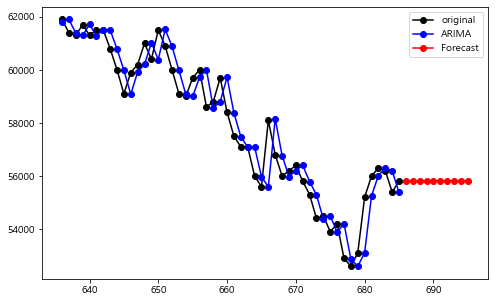

In [44]:
plt.figure(figsize=(8,5))
line1, = plt.plot(sse.Close[-50:], marker='o', color='black')
line2, = plt.plot(model.fittedvalues[-50:], marker='o', color='blue')
line3, = plt.plot(fcast_arima, marker='o', color='red')
plt.legend([line1, line2, line3],['original', 'ARIMA', 'Forecast'])
plt.show()